<a href="https://colab.research.google.com/github/Rhayem1920/ARX_Project/blob/main/Technical_Test_Kaiko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# common libraries for data engineering and machine learning tasks
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
# ignore warnings  
import warnings
warnings.filterwarnings('ignore')


# rectifying visualistaion's parameters to have pretty plots
font={'size': 14,
        'weight' : 'bold',
        'family':'monospace'} # weight could be book,bold etc ...
mpl.rc('font',**font)
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('lines',linewidth=5,c='black')
plt.rcParams["figure.figsize"] = (13,6)
sns.set_style('darkgrid')

# Technical Test 
### Kaiko, Data Analyst Intern Position
For this test, you will work with data provided by Kaiko's API services. This data is market data retrieved on cryptocurrency exchanges. The objective of this test is to evaluate your python skills and your ability to solve a data analyst every day problem by creating solutions using this programming language. The private API key you'll need to use for this test is the following : 8eaf73c41adc6a82a1eb94cc6428ad34. It gives you access to all data you'll need for this data. Historical data is however limited to January 1st, 2021. This API key has been exclusively created for this test, and shouldn't be used for any other usage by the candidate. Finally, you're free to use any packages you wish for this exercise, as long as they are open source and free to install.

The asignment has to be given back as a python jupyter notebook before Tuesday the 16th of February 2022. For any questions about this test, don't hesitate to contact Théo Lafitte at theo.lafitte@kaiko.com. Please be carreful to comment your code, so the reader will be able to understand each steps or your reasoning. Once finished, you can send this completed jupyter notebook to theo.lafitte@kaiko.com.

# Exercise 1 : Gaps in Kaiko's Data
## 1.1 Extract Data from Kaiko's API

Use Case : One Kaiko's client complains about some gaps in the USD Exchange Rates he extracted from Kaiko's API. Kaiko's product team has therefore to check if there are actually gaps in the requested data, and for which period of time. By using Kaiko's API documentation, you're invited to find a way to extract through python, USD exchange rates for the pairs 'weth-usd' and 'owl-usd' at an hourly frequency, from January 1st, 2021. The endpoint you'll need to work with is the following : https://docs.kaiko.com/#cross-price. The data has to be printed as a dataframe.

In addition, don't hesitate to consult Kaiko's instrument explorer to get a full list of the instruments provided by kaiko (exchanges, assets). https://instruments.kaiko.com/#/instruments


In [ ]:
# import libraries to get data 
import requests
import time  
import datetime

## **Get data for Weth-USD Exchange Rate**





In [ ]:
# headers
headers={'X-Api-Key': '8eaf73c41adc6a82a1eb94cc6428ad34','Accept': 'application/json','Accept-Encoding': 'gzip'}  

#url with interval=1h frequency , start_time is 1/1/2021, we can pick at max 1000 rows it means end_time will be 11/02/2021
url='https://us.market-api.kaiko.io/v2/data/trades.v1/spot_exchange_rate/weth/usd?sources=false&interval=1h&start_time=2021-01-01T00:00:00Z&end_time=2021-02-15T00:00:00Z&page_size=1000&sort=asc'

# Make API call
response=requests.get(url,headers=headers).json()

#Get data from dictionary
J = response['data']

#get the json File
from pandas import json_normalize 
df = json_normalize(J)

# Create dataframe
for i in range(len(df)):
  df['timestamp'][i] = datetime.datetime.fromtimestamp(df.timestamp[i] / 1e3) # from timestamp to datetime type
df['date'] = pd.to_datetime(df['timestamp'])  
dts = df[['date','price']]
#Rename columns
dts = dts.rename(columns={'price': 'weth-usd Exch_Rate'})


# show dataframe
dts

,date,weth-usd Exch_Rate
0,2021-01-01 00:00:00,738.4703666034798
1,2021-01-01 01:00:00,742.890035529709
2,2021-01-01 02:00:00,746.4683755904102
3,2021-01-01 03:00:00,749.2607563707705
4,2021-01-01 04:00:00,745.5360773535327
...,...,...
995,2021-02-11 11:00:00,1771.2215250085387
996,2021-02-11 12:00:00,1777.0003757788413
997,2021-02-11 13:00:00,1788.549785438231
998,2021-02-11 14:00:00,1796.7716681000961


## **Get data for owl-USD Exchange Rate**


In [ ]:
# headers
headers={'X-Api-Key': '8eaf73c41adc6a82a1eb94cc6428ad34','Accept': 'application/json','Accept-Encoding': 'gzip'}  

#url with interval=1h frequency , start_time is 1/1/2021, we can pick at max 1000 rows it means end_time will be 11/02/2021
url='https://us.market-api.kaiko.io/v2/data/trades.v1/spot_exchange_rate/owl/usd?sources=false&interval=1h&start_time=2021-01-01T00:00:00Z&end_time=2021-02-15T00:00:00Z&page_size=1000&sort=asc'

# Make API call
response=requests.get(url,headers=headers).json()

#Get data from dictionary
J = response['data']

#get the json File
from pandas import json_normalize 
df = json_normalize(J)

# Create dataframe
for i in range(len(df)):
  df['timestamp'][i] = datetime.datetime.fromtimestamp(df.timestamp[i] / 1e3) # from timestamp to datetime type
df['date'] = pd.to_datetime(df['timestamp'])  
dts2 = df[['date','price']]
#Rename columns
dts2 = dts2.rename(columns={'price': 'owl-usd Exch_Rate'})


# show dataframe
dts2

,date,owl-usd Exch_Rate
0,2021-01-01 00:00:00,1.012639386053804
1,2021-01-01 01:00:00,None
2,2021-01-01 02:00:00,None
3,2021-01-01 03:00:00,None
4,2021-01-01 04:00:00,None
...,...,...
995,2021-02-11 11:00:00,1.1416713586343694
996,2021-02-11 12:00:00,1.2138581931205603
997,2021-02-11 13:00:00,None
998,2021-02-11 14:00:00,None


In [ ]:
df_final=pd.merge(dts,dts2,on='date')
df_final

,date,weth-usd Exch_Rate,owl-usd Exch_Rate
0,2021-01-01 00:00:00,738.4703666034798,1.012639386053804
1,2021-01-01 01:00:00,742.890035529709,None
2,2021-01-01 02:00:00,746.4683755904102,None
3,2021-01-01 03:00:00,749.2607563707705,None
4,2021-01-01 04:00:00,745.5360773535327,None
...,...,...,...
995,2021-02-11 11:00:00,1771.2215250085387,1.1416713586343694
996,2021-02-11 12:00:00,1777.0003757788413,1.2138581931205603
997,2021-02-11 13:00:00,1788.549785438231,None
998,2021-02-11 14:00:00,1796.7716681000961,None


In [ ]:
# Turn our data to numeric type
cols=df_final.columns.tolist()[1:]
for col in cols:
  df_final[col]=pd.to_numeric(df_final[col])

## 1.2 Vizualise Kaiko's Exchange Rates data
You're now invited to provide the Kaiko's support team some vizualization of the gaps observed for the two pairs.

In [ ]:
# plot feature's histtplot
def dist_plot(feature):
    with sns.axes_style('darkgrid'):
        ax=sns.distplot(x=df_final[feature],hist=True,rug=True, hist_kws={"linewidth": 2,"edgecolor":'w'},kde_kws={'linewidth':5},bins=50)
        plt.ylabel(feature,fontsize=14)
        plt.xlabel(xlabel=None)
        plt.xticks(rotation=9)
        plt.grid(b=True)

#plot missing values bar chart
def missing_bar_chart(df):
  import missingno as msno
  msno.bar(df,color='indigo')



### **Distplot for both two pairs**

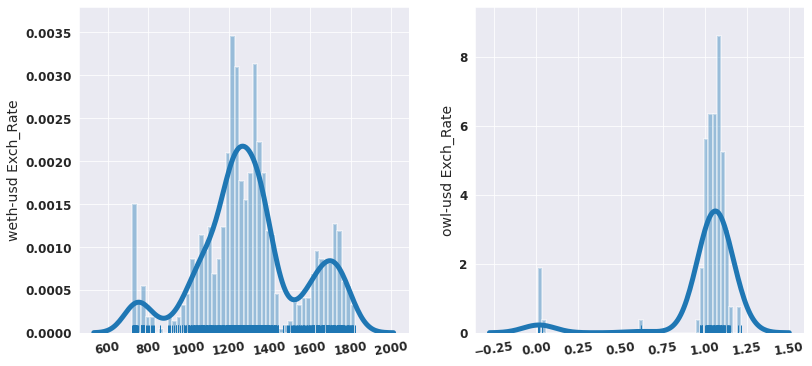

In [ ]:
plt.subplot(1,2,1)
dist_plot('weth-usd Exch_Rate')
plt.subplot(1,2,2)
dist_plot('owl-usd Exch_Rate')

### **Bar plot: checking missing _values**

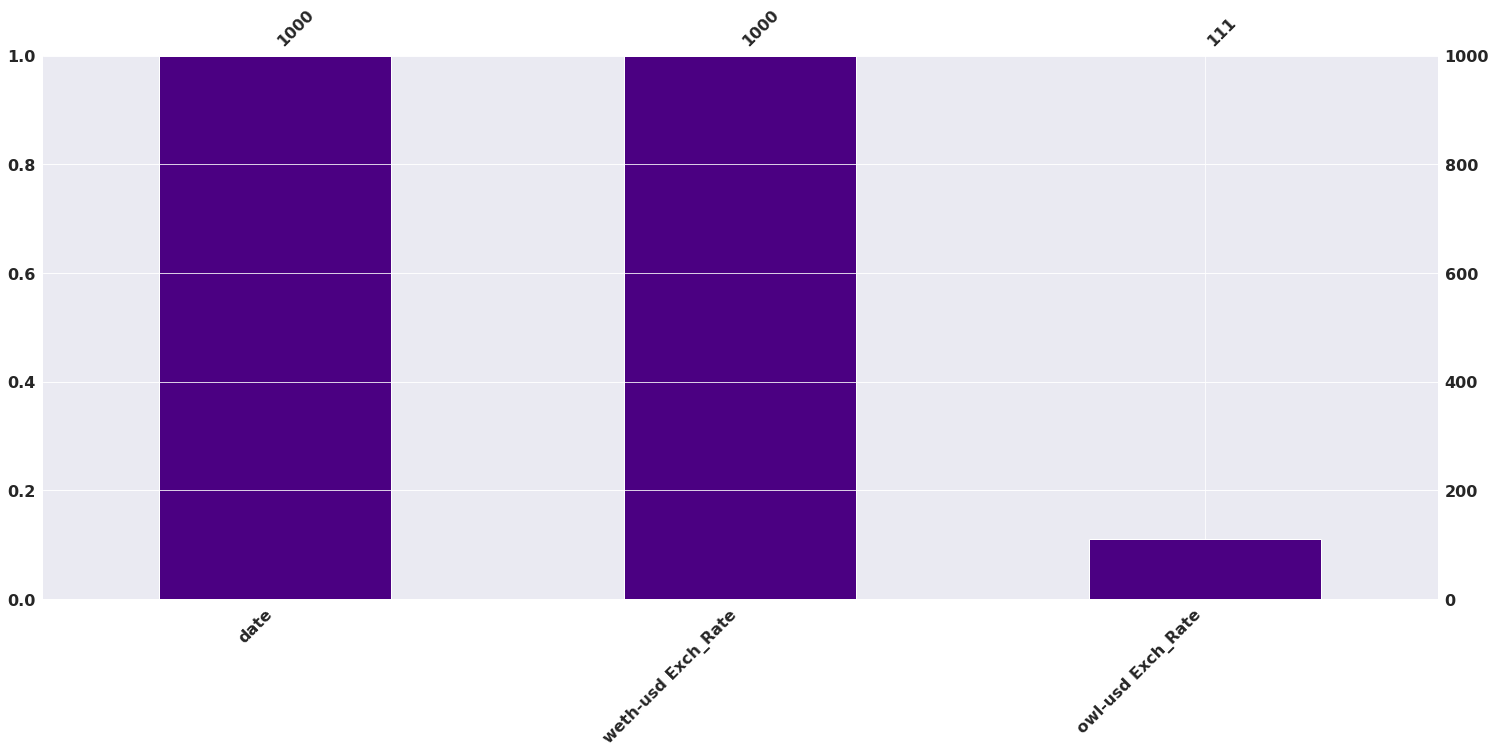

In [ ]:
missing_bar_chart(df_final)


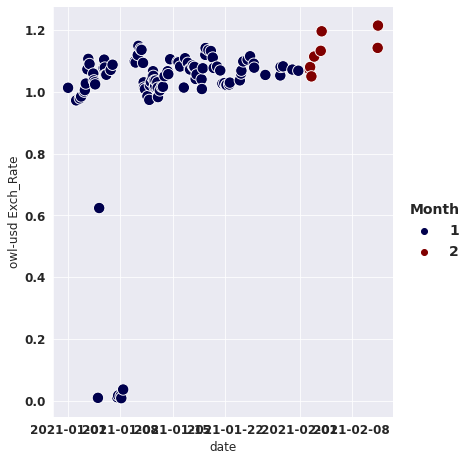

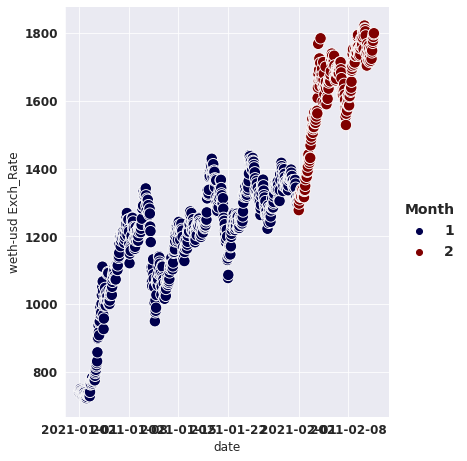

In [ ]:
plt.subplot(1,2,1)
df=df_final.copy()
df['Month'] = df['date'].dt.month
ax=sns.relplot('date','owl-usd Exch_Rate',data=df,hue='Month',palette='seismic',s=130)#last one to better visualisation
fig = plt.gcf()
fig.set_size_inches(11,11,forward=True)
plt.subplot(1,2,1)
ax=sns.relplot('date','weth-usd Exch_Rate',data=df,hue='Month',palette='seismic',s=130)#last one to better visualisation
fig = plt.gcf()
fig.set_size_inches(11,11,forward=True)

### **Boxplot to detect outliers and gaps**

Text(0.5, 1.0, 'Anomaly Detection:OWL-USD')

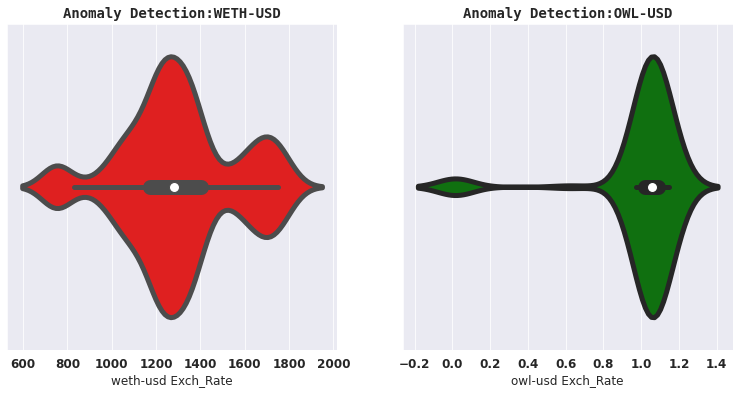

In [ ]:
plt.subplot(1,2,1)
sns.violinplot(df_final['weth-usd Exch_Rate'],color='red',data=df_final)
plt.title('Anomaly Detection:WETH-USD',fontdict=font)
plt.subplot(1,2,2)
sns.violinplot(df_final['owl-usd Exch_Rate'],color='green',data=df_final)
plt.title('Anomaly Detection:OWL-USD',fontdict=font)


## 1.3 Analyse the gaps
By reading carefully Kaiko's API documentation about the used endpoint but also Kaiko's Data Dictionary, please provide an explanation of the gaps observed above. Are those gaps due to the calculation method used by Kaiko to provide synthetic exchange rates ?
The data dictionary : https://www.kaiko.com/pages/cryptocurrency-data-types

# Exercise 2 : Understanding Crypto Markets Data
Kaiko provides an unnoficial python wrapper which allows you to easily get access to some major Kaiko's endpoints, as order book snapshots, order book aggregations, and Trades. Here, the github of the wrapper : https://github.com/sgheb/kaiko-api. To use this wrapper you'll need the API key provided by Kaiko for this Test.

## 2.1 Trades
You're invited for this exercise, to take a a deep look in Tick-Trades Data and extract it for the pair, exchange, and time range of your choice (5 days for example), using the Kaiko wrapper. This data has to be first printed as a dataframe.

In [ ]:
!pip install kaiko
import kaiko

In [ ]:
# Setting a client with my API key
kc = kaiko.KaikoClient(api_key='8eaf73c41adc6a82a1eb94cc6428ad34')

# Getting some simple daily Tick trades Data for the pair BTC-USD
ds = kaiko.TickTrades('lmax', 'btc-usd', start_time='2020-08',interval='1d' ,client=kc)

# Retrieve the dataframe containing the data
ds.df 

In [ ]:
df=ds.df.reset_index()
# Create dataframe
for i in range(len(df)):
  df['timestamp'][i] = datetime.datetime.fromtimestamp(df.timestamp[i] / 1e3) # from timestamp to datetime type
df['date'] = pd.to_datetime(df['timestamp'])  
df=df[['date','price','amount','taker_side_sell']]
df

## 2.2 Vizualise Kaiko's Trade Data
Provide a clear and simple visualization of the extracted trades data. If you wish, you can provide a market analysis on the observations you get from the extracted data.

In [ ]:
!pip install mplfinance

In [ ]:
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import date2num 
from pylab import rcParams

In [ ]:
import matplotlib.dates as mdates
color = sns.color_palette()
#df['Date_mpl'] = df['Start_time'].dt.date
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x= df_final['date'].values,y = df_final[].values, alpha=0.8, color=color[3], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exch Rate in USD', fontsize=12)
plt.title("distribution of Bitcoin", fontsize=15)
plt.show()

In [ ]:
      
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1), (0,0))
df['num_date'] = df['date'].apply(date2num)
ohlc = []
for ind, row in df.iterrows():
    ol = [row['num_date'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
    ohlc.append(ol)
    
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in USD", fontsize=12)
plt.title("Candlestick chart for Bitcoin", fontsize=15)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x= df['date'].values,y = df.Volume.values, alpha=0.8, color=color[4], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume BTC ', fontsize=12)
plt.title("Volume Exchanged of Bitcoin", fontsize=15)
plt.show()

## 2.3 Definitions
By reading Kaiko's Data Dictionary, please provide short answers to the following questions:

A. What is the main difference between Order Books Data and Trades ?

B. How do you interpret the column "takers_sell_side" of the previously extracted dataframe on Trades ?

C. Is there any interesting calculation you can provide using the variables present in the trades dataframe ?

# Exercise 3 : Creativity
This final part is made to test the applicant's capacities to innovate and use his/her tech and financial knowledge to investigate price distribution and anomaly detection. The aim is to explore different ways of detecting extreme values with different methods and summarize your results to provide interesting insights. Don't hesitate to use your statistics/econometrics/machine learning knowledge for this exercise. This will be much appreciated.

**First Approche: Z_score**

**Second Approach: clustering**

**Isolation Forest**

In [ ]:
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(data[['marks']])

print(model.get_params())
data['scores'] = model.decision_function(data[['marks']])

data['anomaly_score'] = model.predict(data[['marks']])

data[data['anomaly_score']==-1].head()
from sklearn.ensemble import IsolationForest
outliers=metrics_df.loc[metrics_df['anomaly']==-1]
outlier_index=list(outliers.index)

**Some Visualisation**

In [ ]:
features_to_display=df.columns.tolist(1:]
for i in range(1,5):
    plt.subplot(2,3,i)
    graphe(features_to_display[i-1])
    
plt.figure(facecolor='grey',edgecolor='black')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=25,
    hspace=35)